In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
merged_df = pd.merge(ride_df, city_df, on = "city", how="left")

# Display the data table for preview
merged_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

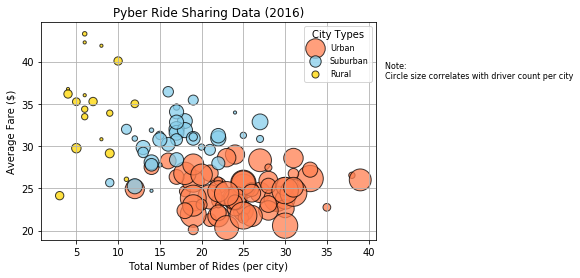

In [10]:
# Obtain the x and y coordinates for each of the three city types
urban_type = merged_df[merged_df["type"]=="Urban"].groupby([merged_df["city"]])
suburban_type = merged_df[merged_df["type"]=="Suburban"].groupby([merged_df["city"]])
rural_type = merged_df[merged_df["type"]=="Rural"].groupby([merged_df["city"]])

#Ride count per city type - x coord.
ride_urban = urban_type["ride_id"].count()
ride_suburban = suburban_type["ride_id"].count()
ride_rural = rural_type["ride_id"].count()

#Fare avg per city type - y coord.
fare_urban = urban_type["fare"].mean()
fare_suburban = suburban_type["fare"].mean()
fare_rural = rural_type["fare"].mean()

#Driver count per city type - size
driver_urban = urban_type["driver_count"].mean()
driver_suburban = suburban_type["driver_count"].mean()
driver_rural = rural_type["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(ride_urban, fare_urban, s = driver_urban *10, label = "Urban", color =["coral"], edgecolor="black", alpha=0.75, marker="o")
plt.scatter(ride_suburban, fare_suburban, s = driver_suburban *10, label = "Suburban", color =["skyblue"], edgecolor="black", alpha=0.75, marker="o")
plt.scatter(ride_rural, fare_rural, s = driver_rural *10, label = "Rural", color =["gold"], edgecolor="black", alpha=0.75, marker="o")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# Create a legend
legend = plt.legend(fontsize =8, title="City Types", loc="best")

# Incorporate a text label regarding circle size
plt.text(42,38,"Note: \nCircle size correlates with driver count per city", fontsize = 8)

# Save Figure
plt.savefig("../Images/PyberRideSharingData.png", bbox_inches = "tight")



In [4]:
# Show plot
plt.show()

## Total Fares by City Type

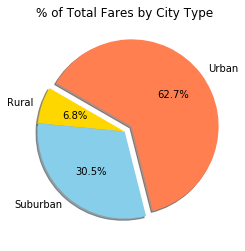

In [5]:
# Calculate Type Percents
type_group = merged_df.groupby(['type'])
fare = type_group['fare'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = [0,0,0.1]
colors = ["gold", "skyblue", "coral"]
plt.title("% of Total Fares by City Type")
plt.pie(fare, labels=labels, explode=explode, colors=colors, shadow=True, autopct="%1.1f%%", startangle=150)

# Save Figure
plt.savefig("../Images/FaresByCityType.png")


In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

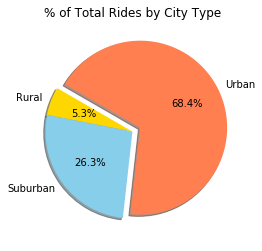

In [7]:
# Calculate Ride Percents
ride = type_group['ride_id'].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = [0,0,0.1]
colors = ["gold", "skyblue", "coral"]
plt.title("% of Total Rides by City Type")
plt.pie(ride, labels=labels, explode=explode, colors=colors, shadow=True, autopct="%1.1f%%", startangle=150)

# Save Figure
plt.savefig("../Images/TotalRidesByCityType.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

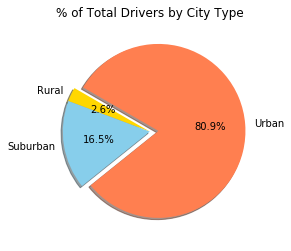

In [12]:
# Calculate Driver Percents
driver_type = city_df.groupby(['type'])
driver = driver_type['driver_count'].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
explode = [0,0,0.1]
colors = ["gold", "skyblue", "coral"]
plt.title("% of Total Drivers by City Type")
plt.pie(driver, labels=labels, explode=explode, colors=colors, shadow=True, autopct="%1.1f%%", startangle=150)

# Save Figure
plt.savefig("../Images/TotalDriversByCityType.png")


In [11]:
# Show Figure
plt.show()